In [2]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path


from patch_input_box import *
from run_verifier import *
import os

GRB_LICENSE_FILE="/root/ERAN/gurobi912/linux64/gurobi.lic"
os.environ["GRB_LICENSE_FILE"] = GRB_LICENSE_FILE
print(os.environ.get("GRB_LICENSE_FILE"))

model_path = "/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx"
test_data_path = "/root/ERAN/data/mnist_test.csv"

images_dir = "/root/Projects/Nathan/Patch-Attack-Verification/images"

# Load the CSV
df = pd.read_csv(test_data_path, header=None)

# Extract labels and image pixels
labels = df.iloc[:, 0].values
pixels = df.iloc[:, 1:].values

/root/Projects/Shuey/Patch-Attack-Verification/util/ERAN/gurobi912/linux64/gurobi.lic
/root/ERAN/gurobi912/linux64/gurobi.lic


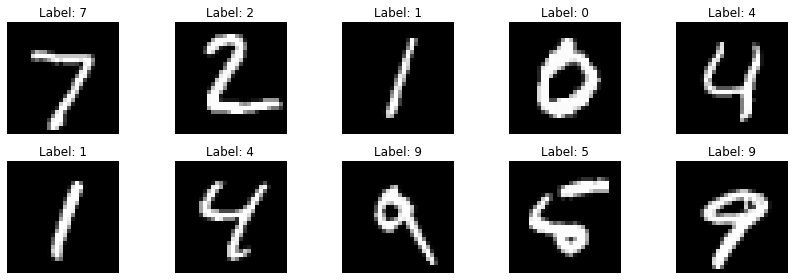

In [5]:
# Display first 10 images
plt.figure(figsize=(12, 4))

for i in range(10):
    img = pixels[i].reshape(28, 28)  # MNIST format
    plt.subplot(2, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {labels[i]}")
    plt.axis("off")

plt.tight_layout()
plt.show()

In [6]:
# use the first picture
img_index = 1
img = pixels[img_index].reshape(28, 28)
label_img = labels[img_index]

i,j,c = 10, 10, 3  # patch parameters

input_box_path = create_patch_input_config_file(img, i, j, c,label=label_img)

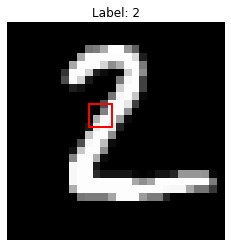

In [7]:
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label_img}")
plt.axis("off")
# draw rectangle for patch
rect = plt.Rectangle((i, j), c, c, edgecolor='red', facecolor='none', linewidth=2)
plt.gca().add_patch(rect)
plt.show()

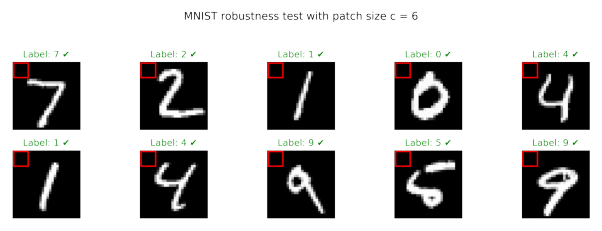

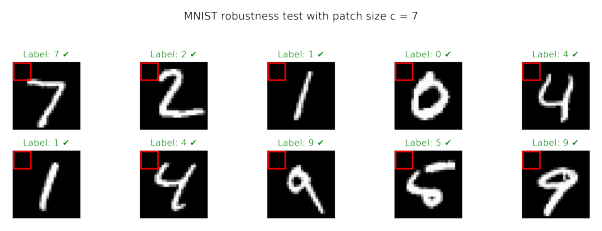

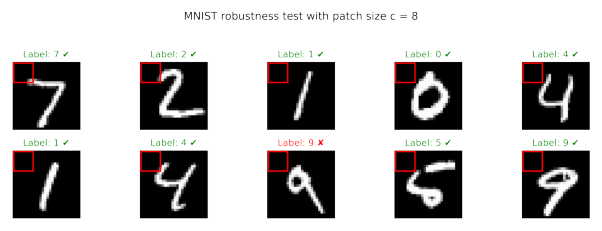

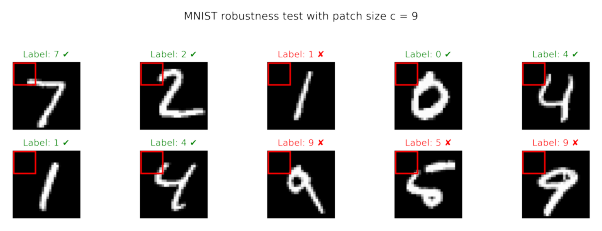

In [8]:
# display figure with 10 digits of mnist
# Display first 10 images
# i = 0
# j = 0

# # Create images directory
# images_dir = Path("images")
# images_dir.mkdir(exist_ok=True)

# for c in range(6, 10):
# 	plt.figure(figsize=(12, 4))
# 	plt.suptitle(f"MNIST robustness test with patch size c = {c}", fontsize=14)

# 	for image_index in range(10):
# 		img = pixels[image_index].reshape(28, 28)
# 		label_img = labels[image_index]

# 		input_box_path = create_patch_input_config_file(img, i, j, c, label=label_img)
# 		dominant_class = run_eran(input_box_path=input_box_path, domain="refinepoly")

# 		plt.subplot(2, 5, image_index + 1)
# 		plt.imshow(img, cmap="gray")

# 		if labels[image_index] == dominant_class:
# 			symbol = "✔"
# 			color = "green"
# 		else:
# 			symbol = "✘"
# 			color = "red"

# 		plt.title(f"Label: {labels[image_index]} {symbol}", color=color)
# 		plt.axis("off")

# 		rect = plt.Rectangle((i, j), c, c, edgecolor="red", facecolor="none", linewidth=2)
# 		plt.gca().add_patch(rect)

# 	plt.tight_layout(rect=[0, 0, 1, 0.93])
# 	output_path = images_dir / f"mnist_patch_robustness_patch_size_{c}_refinepoly.png"
# 	plt.savefig(output_path, dpi=300, bbox_inches="tight")
# 	plt.show()




i = 0
j = 0

images_dir = Path("images")
images_dir.mkdir(exist_ok=True)

for c in range(6, 10):
	output_path = images_dir / f"mnist_patch_robustness_patch_size_{c}_refinepoly.png"

	# If image already exists, load and show it
	if output_path.exists():
		img_loaded = plt.imread(output_path)
		plt.figure(figsize=(12, 4))
		plt.imshow(img_loaded)
		plt.axis("off")
		plt.show()
		continue

	# Otherwise, generate it
	plt.figure(figsize=(12, 4))
	plt.suptitle(f"MNIST robustness test with patch size c = {c}", fontsize=14)

	for image_index in range(10):
		img = pixels[image_index].reshape(28, 28)
		label_img = labels[image_index]

		input_box_path = create_patch_input_config_file(img, i, j, c, label=label_img)
		dominant_class = run_eran(input_box_path=input_box_path, domain="refinepoly")

		plt.subplot(2, 5, image_index + 1)
		plt.imshow(img, cmap="gray")

		if labels[image_index] == dominant_class:
			symbol = "✔"
			color = "green"
		else:
			symbol = "✘"
			color = "red"

		plt.title(f"Label: {labels[image_index]} {symbol}", color=color)
		plt.axis("off")

		rect = plt.Rectangle((i, j), c, c, edgecolor="red", facecolor="none", linewidth=2)
		plt.gca().add_patch(rect)

	plt.tight_layout(rect=[0, 0, 1, 0.93])
	plt.savefig(output_path, dpi=300, bbox_inches="tight")
	plt.show()

dominant_class:  -1
Predicted class for adversarial example: 8
Failed labels during verification using network: [0]
Original label: 1


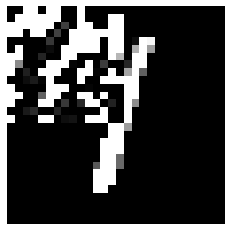

In [20]:
# Take image at index 7 and run deeppoly with parameter of complete = True
# this will first run deeppoly and then because it wont know with deeppoly if it is robust or not
# it will run milp verifier 
index = 2

img = pixels[index].reshape(28, 28)
label_img = labels[index]

# patch size 11 finds adversarial example for index 7
input_box_path = create_patch_input_config_file(img, 0, 0, 15, label=label_img)
dominant_class, example, failed_labels = run_eran(input_box_path=input_box_path, label=label_img, domain="refinepoly", complete=True, timeout_final_milp=3,use_milp=True)
print("dominant_class: ", dominant_class)
clipped = np.clip(example, 0.0, 1.0).tolist()
adv_img = np.array(clipped).reshape(28, 28)
plt.figure(figsize=(4, 4))
plt.imshow(adv_img, cmap="gray")
plt.axis("off")
out = run_onnx("/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx", np.array(adv_img).reshape(1, 1, 28, 28))
# return index with highest score
predicted_class = np.argmax(out[0], axis=1)[0]
print("Predicted class for adversarial example:", predicted_class)
print("Failed labels during verification using network:", failed_labels)
print("Original label:", label_img)

MILP status = 2 (OPTIMAL)
dominant_class:  -1
Predicted class for adversarial example: 0
Failed labels during verification using network: [1]
Original label: 0


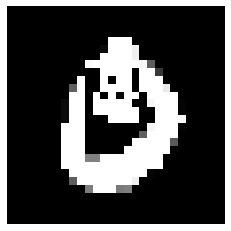

In [8]:
# Take image at index 7 and run deeppoly with parameter of complete = True
# this will first run deeppoly and then because it wont know with deeppoly if it is robust or not
# it will run milp verifier 
index = 3

img = pixels[index].reshape(28, 28)
label_img = labels[index]

# patch size 11 finds adversarial example for index 7
input_box_path = create_patch_input_config_file(img, 8, 10, 7, label=label_img)
dominant_class, example, failed_labels = run_eran(input_box_path=input_box_path, label=label_img, domain="refinepoly", complete=True, timeout_final_milp=30,use_milp=True)
print("dominant_class: ", dominant_class)
clipped = np.clip(example, 0.0, 1.0).tolist()
adv_img = np.array(clipped).reshape(28, 28)
plt.figure(figsize=(4, 4))
plt.imshow(adv_img, cmap="gray")
plt.axis("off")
out = run_onnx("/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx", np.array(adv_img).reshape(1, 1, 28, 28))
# return index with highest score
predicted_class = np.argmax(out[0], axis=1)[0]
print("Predicted class for adversarial example:", predicted_class)
print("Failed labels during verification using network:", failed_labels)
print("Original label:", label_img)

MILP status = 2 (OPTIMAL)
dominant_class:  -1
Predicted class for adversarial example: 4
Failed labels during verification using network: [0]
Original label: 9


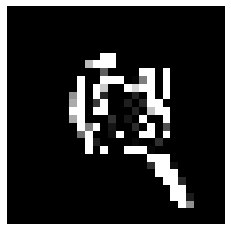

In [6]:
# Take image at index 7 and run deeppoly with parameter of complete = True
# this will first run deeppoly and then because it wont know with deeppoly if it is robust or not
# it will run milp verifier 
index = 7

img = pixels[index].reshape(28, 28)
label_img = labels[index]

# patch size 11 finds adversarial example for index 7
input_box_path = create_patch_input_config_file(img, 8, 10, 11, label=label_img)
dominant_class, example, failed_labels = run_eran(input_box_path=input_box_path, label=label_img, domain="refinepoly", complete=True, timeout_final_milp=4,use_milp=True)
print("dominant_class: ", dominant_class)
clipped = np.clip(example, 0.0, 1.0).tolist()
adv_img = np.array(clipped).reshape(28, 28)
plt.figure(figsize=(4, 4))
plt.imshow(adv_img, cmap="gray")
plt.axis("off")
out = run_onnx("/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx", np.array(adv_img).reshape(1, 1, 28, 28))
# return index with highest score
predicted_class = np.argmax(out[0], axis=1)[0]
print("Predicted class for adversarial example:", predicted_class)
print("Failed labels during verification using network:", failed_labels)
print("Original label:", label_img)

In [6]:
# Take image at index 7 and run deeppoly with parameter of complete = True
# this will first run deeppoly and then because it wont know with deeppoly if it is robust or not
# it will run milp verifier 
index = 7

img = pixels[index].reshape(28, 28)
label_img = labels[index]
time = 30*60  # 30 min
verify_image(index, pixels, labels, 8, 10, 11, timeout_milp=time, with_plots=True, ul=0.5)

# # patch size 11 finds adversarial example for index 7
# input_box_path = create_patch_input_config_file(img, 8, 10, 11, label=label_img)
# dominant_class, example, failed_labels = run_eran(input_box_path=input_box_path, label=label_img, domain="refinepoly", complete=True, timeout_final_milp=4,use_milp=True)
# print("dominant_class: ", dominant_class)
# clipped = np.clip(example, 0.0, 1.0).tolist()
# adv_img = np.array(clipped).reshape(28, 28)
# plt.figure(figsize=(4, 4))
# plt.imshow(adv_img, cmap="gray")
# plt.axis("off")
# out = run_onnx("/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx", np.array(adv_img).reshape(1, 1, 28, 28))
# # return index with highest score
# predicted_class = np.argmax(out[0], axis=1)[0]
# print("Predicted class for adversarial example:", predicted_class)
# print("Failed labels during verification using network:", failed_labels)
# print("Original label:", label_img)


Log file: /root/Projects/Nathan/Patch-Attack-Verification/logs/20260109/20260109_143507_eran_run.log


KeyboardInterrupt: 

In [22]:
# SHUEY ADDED - TRYING AGAIN WITH INDEX 3
index = 3

img = pixels[index].reshape(28, 28)
label_img = labels[index]

# patch size 11 finds adversarial example for index 7
input_box_path = create_patch_input_config_file(img, 8, 10, 6, label=label_img)
dominant_class, example, failed_labels = run_eran(input_box_path=input_box_path, label=label_img, domain="refinepoly", complete=True, timeout_final_milp=3000,use_milp=True) #, adv_labels=[2]

print("dominant_class: ", dominant_class)
if example is None or len(example) == 0:
    print("No adversarial example returned")
else:
    ex = np.array(example, dtype=np.float32).reshape(1, 1, 28, 28)
    pred = np.argmax(run_onnx(model_path, ex)[0])
    print("MILP example prediction:", pred)
    # clipped = np.clip(example, 0.0, 1.0).tolist()
    adv_img = np.array(example).reshape(28, 28)
    plt.figure(figsize=(4, 4))
    plt.imshow(adv_img, cmap="gray")
    plt.axis("off")
    out = run_onnx("/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx", np.array(adv_img).reshape(1, 1, 28, 28))
    # return index with highest score
    predicted_class = np.argmax(out[0], axis=1)[0]
    print("Predicted class for adversarial example:", predicted_class)
    print("Failed labels during verification using network:", failed_labels)
    print("Original label:", label_img)




MILP status = 6 (CUTOFF)
dominant_class:  0
No adversarial example returned


MILP status = 6 (CUTOFF)
dominant_class:  -1
MILP example prediction: 2
Predicted class for adversarial example: 2
Failed labels during verification using network: [2]
Original label: 0


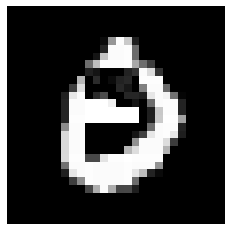

In [ ]:
index = 3

img = pixels[index].reshape(28, 28)
label_img = labels[index]

# patch size 11 finds adversarial example for index 7
input_box_path = create_patch_input_config_file(img, 8, 10, 7, label=label_img)
dominant_class, example, failed_labels = run_eran(input_box_path=input_box_path, label=label_img, domain="refinepoly", complete=True, timeout_final_milp=3000,use_milp=True) #, adv_labels=[2]

print("dominant_class: ", dominant_class)
if example is None or len(example) == 0:
    print("No adversarial example returned")
else:
    plot_adv(example)

    verify_adv_example(example, label_img, failed_labels)


Predicted class for adversarial example: 3


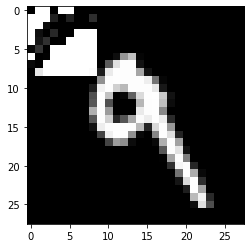

In [7]:
adv_img = [-0.42421292031695124, 2.821486370685737, 2.821486370685737, -0.42421292031695124, 2.821486370685737, 2.821486370685737, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 2.821486370685737, 2.821486370685737, 2.821486370685737, -4.368987127267475e-05, -0.42421292031695124, -0.011466564338014174, -0.42421292031695124, -0.42421292031695124, 0.17133350091709765, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 2.821486370685737, 2.821486370685737, -0.25269222070386294, -0.42421292031695124, -0.42421292031698743, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.4242129203168947, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 2.821486370685736, -0.22865966205181698, -0.42421292031695124, 0.08519264021984625, -0.42421292031695124, -0.42421292031695124, 2.8214863706857387, 2.821486370685737, 2.8214863706857356, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 2.821486370685737, -0.15830766099625643, 0.20518902023831026, -0.42421292031695124, -0.40239765258022864, 2.821486370685737, 2.821486370685737, 2.821486370685737, 2.8214863706857365, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.30636537067155406, 0.24325107540807558, -0.42421292031695124, 2.8214863706857356, 2.821486370685737, 2.821486370685737, 2.821486370685737, 2.821486370685737, 2.8214863706857485, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 2.821486370685737, -0.42421292031695124, -0.39304311629058325, 2.821486370685737, 2.821486370685737, 2.8214863706857356, 2.821486370685737, 2.821486370685737, 2.821486370685737, -0.42421292031695124, -0.42421292031695124, -0.2460176636547396, 1.472293804647866, 2.032336001871133, -0.3605717554959939, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.29996219424674175, -0.42421292031695124, 2.821486370685737, 2.821486370685736, 2.821486370685737, 2.821486370685737, 2.821486370685737, 2.8214863706857365, 2.821486370685737, -0.42421292031695124, 0.7340562661241825, 2.426911186278435, 2.7960299071755883, 2.7960299071755883, -0.18237649278819623, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 2.5048060871583813, 2.821486370685737, 2.821486370685737, 2.821486370685737, 2.821486370685737, 2.821486370685737, 2.821486370685737, 2.7687559386335465, -0.06782240699252795, 2.5669217355842515, 2.8087581389306626, 2.7960299071755883, 2.7960299071755883, 1.6886737444841282, -0.1951047245432705, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 1.4086526458724946, 2.7960299071755883, 2.8087581389306626, 2.7960299071755883, 2.7960299071755883, 2.7960299071755883, 2.6051064308494745, 1.0395338282459645, -0.34784352374091965, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.029637711727305185, 2.6432911261146974, 2.7960299071755883, 2.223259478197247, 1.930510147830539, 2.7960299071755883, 2.7960299071755883, 2.7960299071755883, 2.5160088085639547, -0.11873533401282496, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 0.5813174850632915, 2.8087581389306626, 2.032336001871133, -0.42421292031695124, -0.3223870541851851, 0.8231538884097023, 2.363270027503064, 2.8087581389306626, 2.821486370685737, 2.134161855911727, -0.1951047245432705, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 0.6704151073488113, 2.7960299071755883, 0.5940457168183657, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 1.8923254525653164, 2.7960299071755883, 2.8087581389306626, 2.0068795383609848, -0.2714741271648881, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 1.8032278302797964, 2.7960299071755883, 1.5486631951783114, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 2.5541935038291776, 2.7960299071755883, 2.8087581389306626, 1.2940985600768264, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 0.6704151073488113, 2.7960299071755883, 2.223259478197247, 0.08491639825070726, 0.657686875593737, 1.6886737444841282, 2.7705734436654397, 2.5923781990944, 2.8087581389306626, 2.579649967339326, 0.11037286176085577, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.1951047245432705, 2.6051064308494745, 2.7960299071755883, 2.8087581389306626, 2.7960299071755883, 2.7960299071755883, 1.930510147830539, 0.03400347123041025, 2.325085332237841, 2.7960299071755883, 1.5104784999130887, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 0.4413069357574747, 2.630562894359623, 2.821486370685737, 2.8087581389306626, 1.421380877627569, -0.3223870541851851, -0.42421292031695124, 1.2813703283217521, 2.8087581389306626, 2.4141829545233606, 0.02127523947533599, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 0.4413069357574747, 1.5868478904435341, 1.3831961823623462, -0.2714741271648881, -0.42421292031695124, -0.42421292031695124, -0.30965882243011084, 1.8032278302797964, 2.7960299071755883, 1.6250325857087569, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 0.6958715708589598, 2.7960299071755883, 2.4523676497885836, -0.1951047245432705, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.3987564537840097, 1.6886737444841282, 2.7960299071755883, 1.1795443775517813, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 0.18674225229130129, 2.6942040531349942, 2.7960299071755883, 0.05945993474055875, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 1.0395338282459645, 2.8087581389306626, 1.7650431350145737, -0.30965882243011084, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.1569200292780477, 2.3505417957479895, 2.8087581389306626, 0.1612857887811528, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.04236594348237944, 2.8087581389306626, 1.675945512729054, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, 1.9432383795856132, 2.68147582137992, 0.11037286176085577, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.2460176636547396, 2.4141829545233606, 0.5685892533082172, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124, -0.42421292031695124]

out = run_onnx("/root/ERAN/tf_verify/models/mnist_convSmallRELU__PGDK.onnx", np.array(adv_img).reshape(1, 1, 28, 28))
# return index with highest score
predicted_class = np.argmax(out[0], axis=1)[0]
print("Predicted class for adversarial example:", predicted_class)

import numpy as np
import matplotlib.pyplot as plt

#plot adv_img - list doesn't have reshapre method
plt.imshow(np.array(adv_img).reshape(28, 28), cmap='gray')